In [1]:
import pandas as pd
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

In [2]:
data_1 = pd.read_csv("input_data_SD/1/1-000_00B4328B.txt.csv")

In [3]:
data_1.describe()

,PacketCounter,Acc_X,Acc_Y,Acc_Z,FreeAcc_X,FreeAcc_Y,FreeAcc_Z,Gyr_X,Gyr_Y,Gyr_Z,...,VelInc_Y,VelInc_Z,OriInc_q0,OriInc_q1,OriInc_q2,OriInc_q3,Roll,Pitch,Yaw,Altitude
count,2552.000000,2552.000000,2552.000000,2552.000000,2552.000000,2552.000000,2552.000000,2552.000000,2552.000000,2552.000000,...,2552.000000,2552.000000,2552.000000,2552.000000,2552.000000,2552.000000,2552.000000,2552.000000,2552.000000,2552.0
mean,25716.500000,9.413217,-0.081418,-0.524117,0.051767,0.015159,-0.003180,-0.000333,0.000360,0.001322,...,-0.000819,-0.005243,0.999974,-0.000002,0.000002,0.000007,38.722427,-76.203236,48.752487,0.0
std,736.843267,2.226347,1.595645,2.332567,1.292702,1.300782,1.495547,0.707092,1.176350,0.471134,...,0.015948,0.023326,0.000070,0.003535,0.005881,0.002356,141.491564,18.145132,95.655078,0.0
min,24441.000000,-3.166719,-9.200872,-8.723121,-9.393830,-9.284186,-8.169649,-4.683497,-4.589220,-2.233437,...,-0.092412,-0.087958,0.999351,-0.023412,-0.022944,-0.011166,-179.995208,-89.890272,-179.480513,0.0
25%,25078.750000,9.411154,-0.264510,-2.144712,-0.278341,-0.426710,-0.207999,-0.177555,-0.156672,-0.037188,...,-0.002692,-0.021472,0.999993,-0.000888,-0.000783,-0.000186,-54.855570,-84.584808,-72.930212,0.0
50%,25716.500000,9.611775,0.095199,-1.459347,0.063505,0.020016,0.004310,-0.012450,0.009502,-0.002648,...,0.000931,-0.014587,0.999999,-0.000062,0.000048,-0.000013,58.452096,-78.807388,103.915554,0.0
75%,26354.250000,9.910495,0.365107,0.494808,0.339626,0.411341,0.236982,0.174284,0.137326,0.034197,...,0.003675,0.004874,1.000000,0.000871,0.000686,0.000171,174.003895,-77.272385,105.736898,0.0
max,26992.000000,17.556517,10.140162,11.557536,10.708807,9.956940,8.798933,5.647432,5.454862,2.140362,...,0.100848,0.116945,1.000000,0.028233,0.027268,0.010701,179.998666,8.505572,179.429198,0.0


In [4]:
data_1.shape

(2552, 30)

In [25]:
data_1.columns

Index(['PacketCounter', 'SampleTimeFine', 'Acc_X', 'Acc_Y', 'Acc_Z',
       'FreeAcc_X', 'FreeAcc_Y', 'FreeAcc_Z', 'Gyr_X', 'Gyr_Y', 'Gyr_Z',
       'Mag_X', 'Mag_Y', 'Mag_Z', 'VelInc_X', 'VelInc_Y', 'VelInc_Z',
       'OriInc_q0', 'OriInc_q1', 'OriInc_q2', 'OriInc_q3', 'Roll', 'Pitch',
       'Yaw', 'Latitude', 'Longitude', 'Altitude', 'Vel_X', 'Vel_Y', 'Vel_Z'],
      dtype='object')

In [5]:
data_1.columns = list(map(lambda c: c.strip(), data_1.columns))

In [6]:
# SampleTimeFine, Latitude, Longitude, Vel_X, VelY, Vel_Z are always empty
data_1.sample(5)

,PacketCounter,SampleTimeFine,Acc_X,Acc_Y,Acc_Z,FreeAcc_X,FreeAcc_Y,FreeAcc_Z,Gyr_X,Gyr_Y,...,OriInc_q3,Roll,Pitch,Yaw,Latitude,Longitude,Altitude,Vel_X,Vel_Y,Vel_Z
224,24665,,9.604913,-0.062883,-2.084400,-0.193395,-0.106426,0.013518,-0.016206,0.067969,...,-0.000111,175.806382,-78.151521,104.519056,,,0.0,,,
2151,26592,,2.583628,-1.212591,4.097151,1.540836,-1.707850,-5.381128,-1.761848,2.715108,...,0.006779,-33.861369,-7.817492,-80.696183,,,0.0,,,
891,25332,,9.617953,-0.279851,-2.033847,-0.255590,-0.031207,0.018567,-0.199930,0.055026,...,0.000186,-179.318749,-77.895004,103.081587,,,0.0,,,
1148,25589,,9.591692,-0.283024,-1.865126,-0.386879,0.219325,-0.047362,0.006980,0.060722,...,0.000012,178.805681,-77.253476,103.953569,,,0.0,,,
284,24725,,9.948373,-0.386605,0.208804,-0.635631,0.785861,0.093949,-0.108787,0.394435,...,-0.000162,167.527093,-86.248419,110.094187,,,0.0,,,


In [29]:
import os

data_path = "input_data_SD"
participant_files = list(filter(lambda x: ".txt.csv" in x, os.listdir(f"{data_path}/2")))

In [30]:
import re

# Pattern to match walking surface (1st capture group) and sensor location (2nd capture group) from a data file name
pattern = re.compile(r"^(\d{1,2})\-000_00B432([\w]{2})\.txt\.csv$")
print(len(participant_files))
sorted([(m.group(1), m.group(2)) for m in map(pattern.match, participant_files)], key=lambda entry: (int(entry[0]), entry[1]))

342


[('1', '8B'),
 ('1', '93'),
 ('1', '95'),
 ('1', '9B'),
 ('1', 'B6'),
 ('1', 'CC'),
 ('2', '8B'),
 ('2', '93'),
 ('2', '95'),
 ('2', '9B'),
 ('2', 'B6'),
 ('2', 'CC'),
 ('3', '8B'),
 ('3', '93'),
 ('3', '95'),
 ('3', '9B'),
 ('3', 'B6'),
 ('3', 'CC'),
 ('4', '8B'),
 ('4', '93'),
 ('4', '95'),
 ('4', '9B'),
 ('4', 'B6'),
 ('4', 'CC'),
 ('5', '8B'),
 ('5', '93'),
 ('5', '95'),
 ('5', '9B'),
 ('5', 'B6'),
 ('5', 'CC'),
 ('6', '8B'),
 ('6', '93'),
 ('6', '95'),
 ('6', '9B'),
 ('6', 'B6'),
 ('6', 'CC'),
 ('7', '8B'),
 ('7', '93'),
 ('7', '95'),
 ('7', '9B'),
 ('7', 'B6'),
 ('7', 'CC'),
 ('8', '8B'),
 ('8', '93'),
 ('8', '95'),
 ('8', '9B'),
 ('8', 'B6'),
 ('8', 'CC'),
 ('9', '8B'),
 ('9', '93'),
 ('9', '95'),
 ('9', '9B'),
 ('9', 'B6'),
 ('9', 'CC'),
 ('10', '8B'),
 ('10', '93'),
 ('10', '95'),
 ('10', '9B'),
 ('10', 'B6'),
 ('10', 'CC'),
 ('11', '8B'),
 ('11', '93'),
 ('11', '95'),
 ('11', '9B'),
 ('11', 'B6'),
 ('11', 'CC'),
 ('12', '8B'),
 ('12', '93'),
 ('12', '95'),
 ('12', '9B'),
 ('1

#### Plot FreeAcc_X raw and filtered with 2-nd order Butterworth

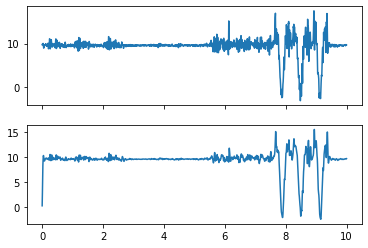

In [28]:
data = data_1.Acc_X
t = np.linspace(0, 10, len(data))
y = data
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
# Raw data
ax1.plot(t, y)
# Filtered
sos = signal.butter(2, 6, btype="lp", fs=100, output="sos")
ax2.plot(t, signal.sosfilt(sos, y))